In [6]:
import csv
import matplotlib.pyplot as plt
import os
import laspy
import numpy as np
import math

# file_path = r"C:\Users\telukkari\Downloads\1669402_25461.csv"
# file_path = r"C:\Users\telukkari\Downloads\1669468_25442.csv"
folder_path = r"C:\Users\telukkari\Documents\Data\Padasjoki_csv_20231023"
folder_path_denser_vecs = r"C:\Users\telukkari\Documents\Data\Padasjoki_csv"
output_folder = r"C:\Users\telukkari\Documents\Python\forest_road_change_detection\data\road_vecs_las_Padasjoki_20231023"

counters = []

print(f"Road vectors in total: {len(os.listdir(folder_path))}")

for i, file in enumerate(os.listdir(folder_path)):
    x_coords = []
    y_coords = []

    counter = 0

    file_path = os.path.join(folder_path, file)
    las_file_path = os.path.splitext(file_path)[0] + ".las"
    try:
        with open(file_path, newline='', encoding='utf-8') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                if len(row) < 2:
                    continue  
                if math.isnan(float(row[0])) and math.isnan(float(row[1])):
                    counter += 1
                    continue
                else:
                    x = float(row[0])
                    y = float(row[1])
                    x_coords.append(x)
                    y_coords.append(y)
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError in file: {file_path}")
        print(e)

    # if counter > 0:
    #     counters.append(counter)

    if counter > 1:
        x_coords = []
        y_coords = []

        counter = 0

        file_path = os.path.join(folder_path_denser_vecs, file)
        las_file_path = os.path.splitext(file_path)[0] + ".las"
        with open(file_path, newline='', encoding='utf-8') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                if len(row) < 2:
                    continue  
                if math.isnan(float(row[0])) and math.isnan(float(row[1])):
                    counter += 1
                    continue
                else:
                    x = float(row[0])
                    y = float(row[1])
                    x_coords.append(x)
                    y_coords.append(y)

    x = np.array(x_coords)
    y = np.array(y_coords)
    z = np.zeros_like(y_coords)

    header = laspy.LasHeader(point_format=6, version="1.4")

    las = laspy.LasData(header)
    las.x = x
    las.y = y
    las.z = z

    filename = os.path.splitext(file)[0] + ".las"

    output_path = os.path.join(output_folder, filename)
    if counter < 4:
        las.write(output_path)
        print(f"Saved: {output_path}")

print(counters)
print(f"Road vecs with missing points: {len(counters)}")

Road vectors in total: 41682
Saved: C:\Users\telukkari\Documents\Python\forest_road_change_detection\data\road_vecs_las_Padasjoki_20231023\1002239597_34496.las
Saved: C:\Users\telukkari\Documents\Python\forest_road_change_detection\data\road_vecs_las_Padasjoki_20231023\1002239722_34494.las
Saved: C:\Users\telukkari\Documents\Python\forest_road_change_detection\data\road_vecs_las_Padasjoki_20231023\1002371951_29693.las
Saved: C:\Users\telukkari\Documents\Python\forest_road_change_detection\data\road_vecs_las_Padasjoki_20231023\1004615919_39423.las
Saved: C:\Users\telukkari\Documents\Python\forest_road_change_detection\data\road_vecs_las_Padasjoki_20231023\1004615941_28326.las
Saved: C:\Users\telukkari\Documents\Python\forest_road_change_detection\data\road_vecs_las_Padasjoki_20231023\1004750877_39241.las
Saved: C:\Users\telukkari\Documents\Python\forest_road_change_detection\data\road_vecs_las_Padasjoki_20231023\1004803562_510.las
Saved: C:\Users\telukkari\Documents\Python\forest_road_c

KeyboardInterrupt: 

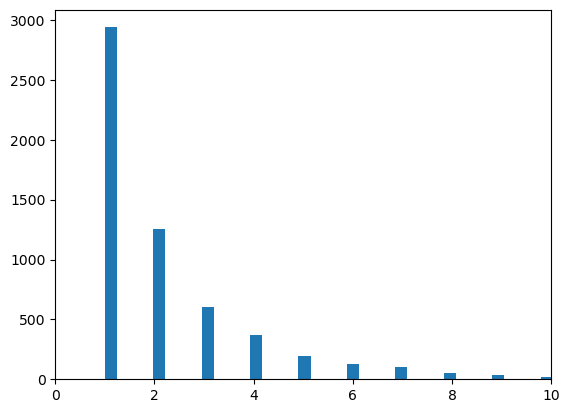

In [9]:
plt.hist(counters, bins=1000)
plt.xlim((0,10))
plt.show()

In [16]:
import numpy as np
import laspy

x = np.array(x_coords)
y = np.array(y_coords)
z = np.zeros_like(x_coords) 

header = laspy.LasHeader(point_format=3, version="1.2")
header.offsets = [np.min(x), np.min(y), np.min(z)]
header.scales = [0.001, 0.001, 0.001]  # millimeter precision

las = laspy.LasData(header)
las.x = x
las.y = y
las.z = z

# Save LAS file
las.write("data/road_patch_example.las")


In [10]:
import math

distances = []

for i, (x, y) in enumerate(zip(x_coords, y_coords)):
    if i != 0:
        x_prev = x_coords[i - 1]
        y_prev = y_coords[i - 1]
        
        dist = math.sqrt((x - x_prev)**2 + (y - y_prev)**2)
        distances.append(dist)

print(distances)


[5.299999999546644, 5.100000000558253, 4.899999999750144, 5.000000000154574, 5.100000000616405, 0.4999999998945385, 1.2894815254363758, 3.1825182108394188, 4.9999999997722755, 4.999999999670057, 0.8000000003411329, 4.194467843462165, 3.8000000001796694, 1.195766626190562, 0.7999999992503695, 0.39841206663830164, 3.760155874803592, 0.20000000002054935, 3.9976744273345335, 0.7970848075404485, 1.2000000010473784, 1.999315525538516, 1.799144723464494, 0.2000000019682756, 0.8984782829500284, 1.9544153125118742, 1.9989691621494161, 0.0, 1.998657030855427, 2.9987179604160694, 0.999999998709568, 3.998151815119254, 0.0, 0.5986484000276806, 4.339485108984867, 1.5999999973796006, 3.4974550330491594, 0.4999999975862866, 1.2977731155187318, 3.180439527117924, 0.8000000037744923, 1.9968397035702694, 1.9993490542458625, 0.19900340871430597, 1.8000000005225423, 1.5993625035332313, 1.592358570171768, 4.999999998499492, 1.3999999996225403, 1.9963240617398128, 1.599545030151584, 0.5999999975745077, 1.961

In [ ]:
import h5py
import numpy as np

file_path = r"c:\Users\telukkari\Downloads\Vain_vektori_ja_tihennys.mat"

with h5py.File(file_path, 'r') as f:
    densevec = f['densevec']
    print("densemap shape:", densevec.shape)

    # Example: read first 5 references
    refs = densevec[0, :1]
    for i, ref in enumerate(refs):
        obj = f[ref]
        print(f"\nEntry {i}: type = {type(obj)}")
        print("Name:", obj.name)
        print("Shape:", getattr(obj, 'shape', None))
        print("Dtype:", getattr(obj, 'dtype', None))
        data = obj[()]
        if isinstance(obj, h5py.Dataset):
            print("Data (sample):", obj[()][:100])



densemap shape: (1, 49496)
densemap dtype: object

Entry 0: type = <class 'h5py._hl.dataset.Dataset'>
Name: /#refs#/v3m
Shape: (2, 9361)
Dtype: float64
Data (sample): [[ 390665.617       390665.69420802  390665.77141603 ...  391282.02035998
   391282.1127754   391282.20519082]
 [6812741.541      6812741.60455252 6812741.66810503 ... 6813254.83684774
  6813254.79864577 6813254.76044381]]
[[ 390665.617       390665.69420802  390665.77141603 ...  391282.02035998
   391282.1127754   391282.20519082]
 [6812741.541      6812741.60455252 6812741.66810503 ... 6813254.83684774
  6813254.79864577 6813254.76044381]]


In [ ]:
import h5py
import numpy as np

def read_h5_obj(obj, file):
    """Recursively read MATLAB v7.3 HDF5 objects into native Python structures."""
    # Case 1: It's a dataset
    if isinstance(obj, h5py.Dataset):
        data = obj[()]
        # Handle bytes → str
        if data.dtype.kind == 'S':
            data = data.astype(str)
        # Dereference object references inside datasets
        if data.dtype == np.object_ or np.issubdtype(data.dtype, np.object_):
            return [read_h5_obj(file[ref], file) for ref in data.flat]
        return data

    # Case 2: It's a group (MATLAB struct)
    elif isinstance(obj, h5py.Group):
        out = {}
        for key, val in obj.items():
            out[key] = read_h5_obj(val, file)
        return out

    # Case 3: It's an object reference
    elif isinstance(obj, h5py.Reference):
        return read_h5_obj(file[obj], file)

    # Case 4: It's a numpy array (maybe of references)
    elif isinstance(obj, np.ndarray):
        result = []
        for item in obj.flat:
            if isinstance(item, h5py.Reference):
                result.append(read_h5_obj(file[item], file))
            else:
                result.append(item)
        return np.array(result, dtype=object).reshape(obj.shape)

    # Default: return as is
    else:
        return obj


file_path = r"c:\Users\telukkari\Downloads\Vain_vektori_ja_tihennys.mat"

with h5py.File(file_path, 'r') as f:
    # Example: read densemap completely
    densemap_data = read_h5_obj(f['densemap'], f)
    densevec_data = read_h5_obj(f['densevec'], f)
    ncst_data = read_h5_obj(f['ncst'], f)
    splitid_data = read_h5_obj(f['splitid'], f)
    vec_splits_data = read_h5_obj(f['vec_splits'], f)

# Now you can inspect actual contents
print("densemap_data type:", type(densemap_data))
print("densemap_data sample:", densemap_data[:2] if isinstance(densemap_data, (list, np.ndarray)) else densemap_data)



In [85]:
# for i in range(5000):
#     if len(densemap_data[i][0]) > 10000:
#         print(i)

i = 191
# print(len(densemap_data))
# print(len(densemap_data[i][0]))
print(len(ncst_data[i][0]))
print(len(densevec_data[i][0]))
print(len(densevec_data[i][1]))
print(densevec_data[i][0])
print(densevec_data[i][1])

# print(len(splitid_data[i][0]))
# print(len(vec_splits_data[i][0]))

# print(densemap_data[i])
# print(densevec_data[i])
# print(ncst_data[i])
# print(splitid_data[i])
# print(vec_splits_data[i])

187
10042
10042
[379382.183      379382.08452704 379381.98605409 ... 378483.7122111
 378483.62648749 378483.54076387]
[6780384.302      6780384.28459089 6780384.26718178 ... 6780030.38893881
 6780030.44043116 6780030.49192351]


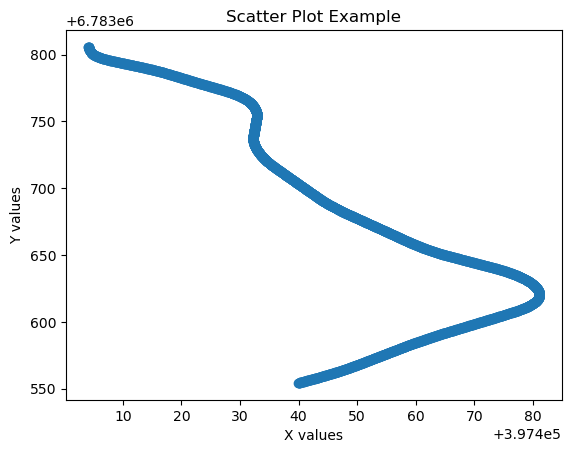

In [77]:
import matplotlib.pyplot as plt


# Create scatter plot
plt.scatter(densevec_data[i][0], densevec_data[i][1])

# Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot Example')

# Show the plot
plt.show()